In [43]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy
import pandas as pd                #for handling datasets
import statsmodels.api as sm       #for statistical modeling
import pylab as pl                 #for plotting
import numpy as np                 #for numerical computation

In [44]:
dfTrain = pd.read_csv("train_university_admission_data.csv")
dfTest = pd.read_csv("test_university_admission_data.csv")

In [45]:
print(dfTrain.head())

   admit  gre   gpa prestige
0      0  380  3.61     good
1      1  660  3.67     good
2      1  800  4.00     best
3      1  640  3.19       ok
4      0  520  2.93       ok


In [46]:
print(dfTest.head())

   gre   gpa  prestige
0  640  3.30  veryGood
1  660  3.60      good
2  400  3.15  veryGood
3  680  3.98  veryGood
4  220  2.83      good


In [5]:
print(pd.crosstab(dfTrain['admit'], dfTrain['prestige'], rownames=['admit']))

prestige  best  good  ok  veryGood
admit                             
0           20    73  47        68
1           25    19   9        39


In [6]:
dfTrain.groupby('admit').mean()

,gre,gpa
admit,,
0,573.461538,3.336587
1,630.217391,3.498478


In [7]:
dfTrain.groupby('admit').sum()

,gre,gpa
admit,,
0,119280,694.01
1,57980,321.86


In [8]:
dfTrain.groupby('admit').count()

,gre,gpa,prestige
admit,,,
0,208,208,208
1,92,92,92


In [9]:
dfTrain.groupby('admit').size()

admit
0    208
1     92
dtype: int64

In [10]:
dfTrain.prestige.unique()

array(['good', 'best', 'ok', 'veryGood'], dtype=object)

In [11]:
dfTrain.prestige.nunique()

4

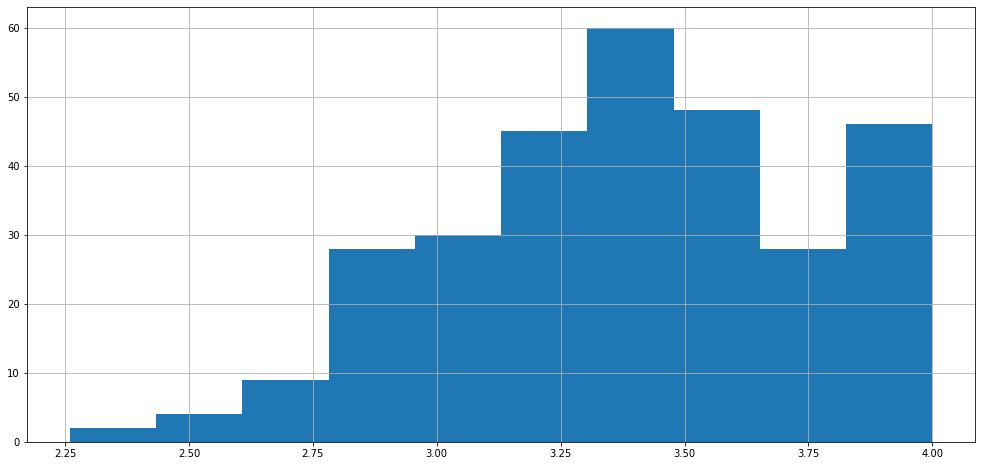

In [12]:
dfTrain['gpa'].hist(figsize=(17,8))

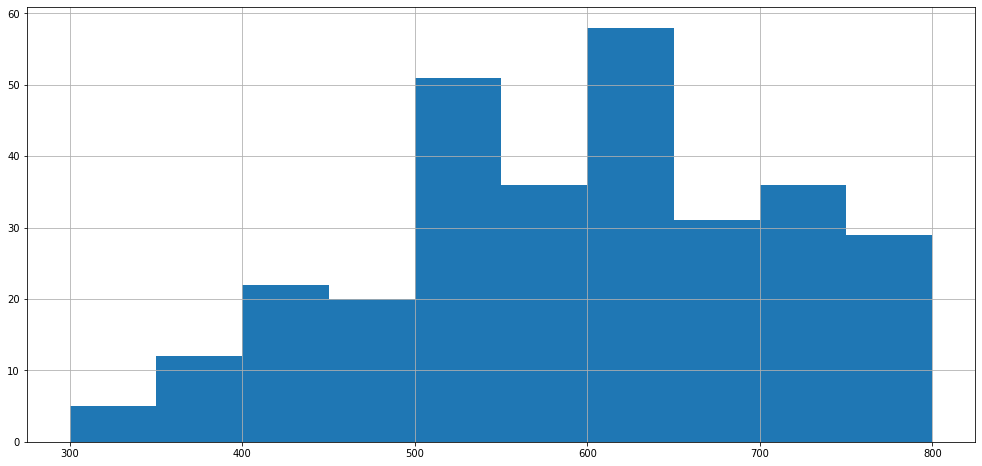

In [13]:
dfTrain['gre'].hist(figsize=(17,8))

In [14]:
print(pd.crosstab(dfTrain['admit'], dfTrain['prestige'], rownames=['admit']))

prestige  best  good  ok  veryGood
admit                             
0           20    73  47        68
1           25    19   9        39


In [15]:
print(pd.crosstab(dfTrain['prestige'], dfTrain['admit'], rownames=['prestige']))

admit      0   1
prestige        
best      20  25
good      73  19
ok        47   9
veryGood  68  39


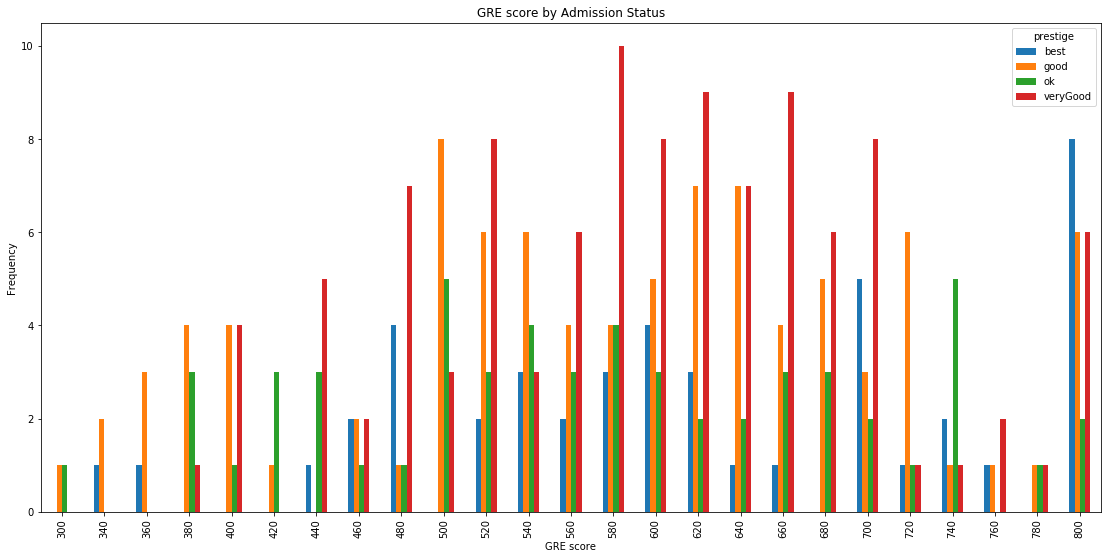

In [51]:
pd.crosstab(dfTrain.gre, dfTrain.prestige).plot(kind='bar',figsize=(19,9))
pl.title('GRE score by Admission Status')
pl.xlabel('GRE score')
pl.ylabel('Frequency')
pl.show()

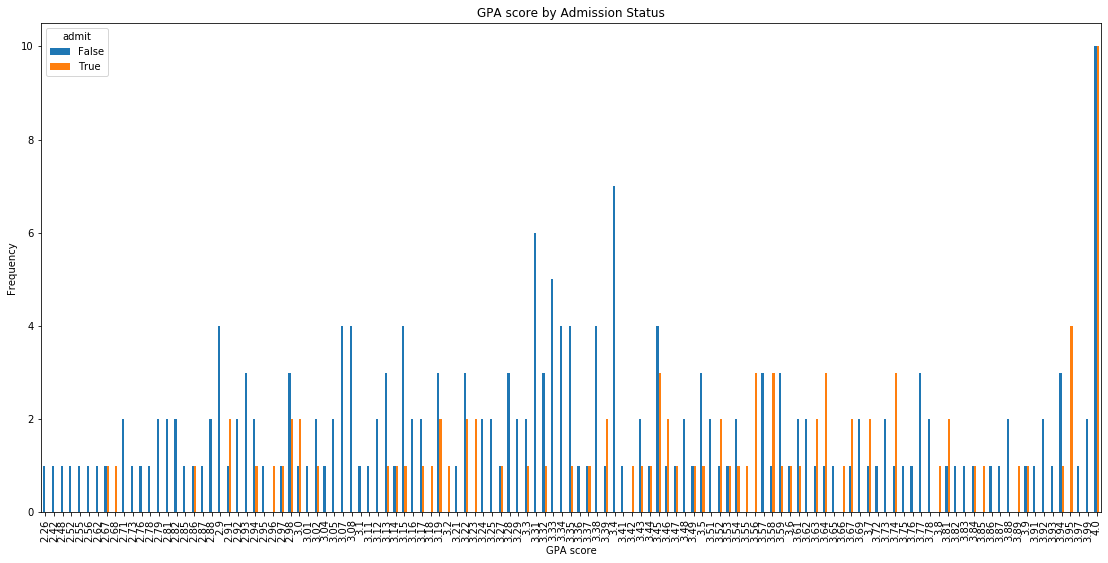

In [17]:
pd.crosstab(dfTrain.gpa, dfTrain.admit.astype(bool)).plot(kind='bar',figsize=(19,9))
pl.title('GPA score by Admission Status')
pl.xlabel('GPA score')
pl.ylabel('Frequency')
pl.show()

In [18]:
mydata=dfTrain.groupby('admit').size()
print(mydata)

admit
0    208
1     92
dtype: int64


In [19]:
mydata=dfTrain.groupby('prestige').size()
print(mydata)

prestige
best         45
good         92
ok           56
veryGood    107
dtype: int64


In [20]:
dfTrain.shape

(300, 4)

In [21]:
dfTrain.ndim

2

dfTrain.corr(method='pearson')

In [22]:
dfTrain.corr(method='pearson')

,admit,gre,gpa
admit,1.000000,0.222689,0.199463
gre,0.222689,1.000000,0.377243
gpa,0.199463,0.377243,1.000000


In [23]:
dfTrain.dtypes

admit         int64
gre           int64
gpa         float64
prestige     object
dtype: object

In [24]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
admit       300 non-null int64
gre         300 non-null int64
gpa         300 non-null float64
prestige    300 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 9.5+ KB


In [25]:
dfTrain.info

<bound method DataFrame.info of      admit  gre   gpa  prestige
0        0  380  3.61      good
1        1  660  3.67      good
2        1  800  4.00      best
3        1  640  3.19        ok
4        0  520  2.93        ok
..     ...  ...   ...       ...
295      0  520  3.25      good
296      0  560  3.16      best
297      0  460  3.07  veryGood
298      0  540  3.50  veryGood
299      0  720  3.40      good

[300 rows x 4 columns]>

In [26]:
dfTrain.skew()

admit    0.842776
gre     -0.118480
gpa     -0.189184
dtype: float64

In [27]:
dfTrain.kurt()

admit   -1.298429
gre     -0.556945
gpa     -0.503985
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F2178DC8C8>,
      dtype=object)

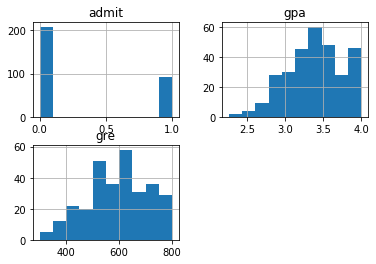

In [28]:
dfTrain.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F217852788>,
      dtype=object)

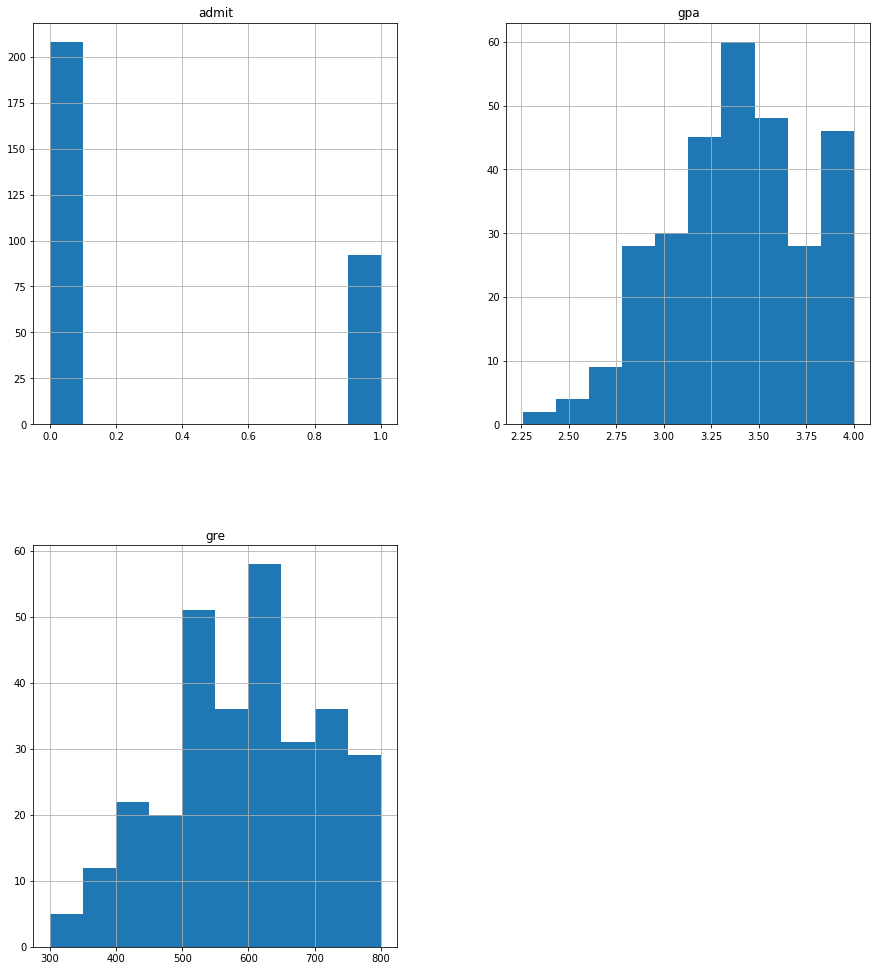

In [29]:
x = dfTrain.hist(figsize=(15,17))
x

admit       AxesSubplot(0.125,0.125;0.227941x0.755)
gre      AxesSubplot(0.398529,0.125;0.227941x0.755)
gpa      AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

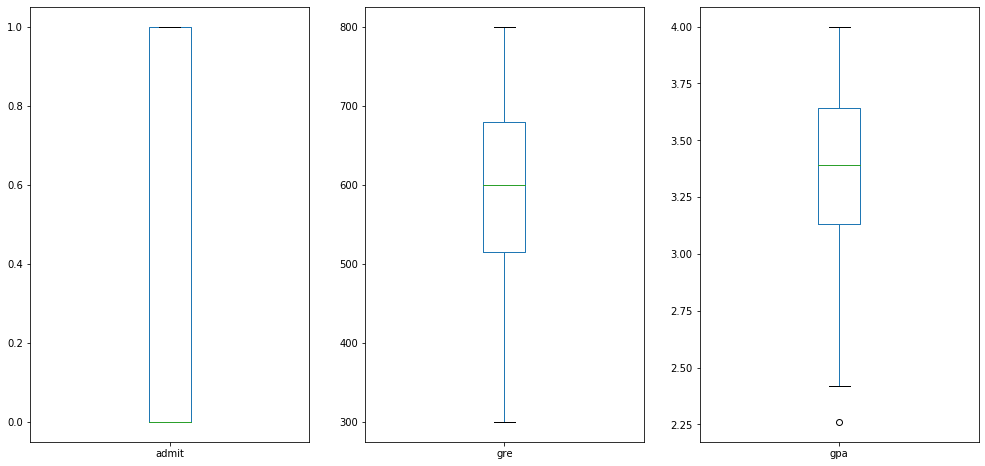

In [30]:
dfTrain.plot(kind='box', subplots = True, figsize=(17,8))

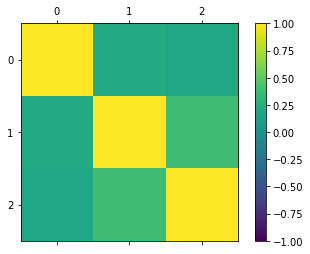

In [42]:
correlations = dfTrain.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
#ax.set_xticks(ticks)
#ax.set_yticks(ticks)
#ax.set_xticklabels(names)
#ax.set_yticklabels(names)
#plt.show()